## CMSC478 HW1
### Kyle Dell
Linear Regression Model using Gradient Descent

In [25]:
import matplotlib.pyplot as plt
import time
import numpy as np
import math


## Problem 1
### Part a
 Scaling the features of the data and also scaling the y

In [26]:
f = open("mileage.csv", "r")
f = f.readlines()
data = []
for line in f:
    line = line.split(",,")[0].split(",")[1:]
    data.append(line)
data = data[1:]
y = []

for line in data:
    for i in range(len(line)):
        if "." in line[i]:
            line[i] = float(line[i])
        else:
            line[i] = int(line[i])

for line in data:
    y.append(line[0])

def calculate_mean(column):
    sum = 0
    for i in range(len(data)):
        sum += data[i][column]
    return sum / len(data)

def calculate_variance(column, mean):
    sum = 0 
    for i in range(len(data)):
        sum += (data[i][column] - mean) ** 2
    return sum / len(data)

scaled_values = []
for i in range(len(data)):
    scaled_values.append([])

for column in range(len(data[0])):
    mean = calculate_mean(column)
    var = calculate_variance(column, mean)
    for row in range(len(data)):
        scaled_values[row].append((data[row][column] - mean) / math.sqrt(var))

for line in scaled_values:
    line[0] = 1
print(y)
print()
print(scaled_values)
print(len(scaled_values))


[21, 21, 22.8, 21.4, 18.7, 18.1, 14.3, 24.4, 22.8, 19.2, 17.8, 16.4, 17.3, 15.2, 10.4, 10.4, 14.7, 32.4, 30.4, 33.9, 21.5, 15.5, 15.2, 13.3, 19.2, 27.3, 26, 30.4, 15.8, 19.7, 15, 21.4]

[[1, -0.1066677201802167, -0.5797503155171959, -0.5436548688210416, 0.5765944809371285, -0.6201665807281301, -0.7896005773826668, -0.8819171036881969, 1.2089410496539776, 0.43033148291193524, 0.7469670772722139], [1, -0.1066677201802167, -0.5797503155171959, -0.5436548688210416, 0.5765944809371285, -0.35538218878895345, -0.4712017847027086, -0.8819171036881969, 1.2089410496539776, 0.43033148291193524, 0.7469670772722139], [1, -1.2444567354358613, -1.0060260103696608, -0.7955699017330063, 0.48158406183317337, -0.9316776300683385, 0.43282335879931727, 1.1338934190276817, 1.2089410496539776, 0.43033148291193524, -1.1401076442575897], [1, -0.1066677201802167, 0.22361541708937266, -0.5436548688210416, -0.9815763923677409, -0.0023363328700511873, 0.9047358550928287, 1.1338934190276817, -0.827170191868511, -0.

The scaled values came out to be: <br/> <br/>
[[1, -0.1066677201802167, -0.5797503155171959, -0.5436548688210416, 0.5765944809371285, -0.6201665807281301, -0.7896005773826668, -0.8819171036881969, 1.2089410496539776, 0.43033148291193524, 0.7469670772722139],
<br/>[1, -0.1066677201802167, -0.5797503155171959, -0.5436548688210416, 0.5765944809371285, -0.35538218878895345, -0.4712017847027086, -0.8819171036881969, 1.2089410496539776, 0.43033148291193524, 0.7469670772722139], 
<br/>[1, -1.2444567354358613, -1.0060260103696608, -0.7955699017330063, 0.48158406183317337, -0.9316776300683385, 0.43282335879931727, 1.1338934190276817, 1.2089410496539776, 0.43033148291193524, -1.1401076442575897], 
<br/>[1, -0.1066677201802167, 0.22361541708937266, -0.5436548688210416, -0.9815763923677409, -0.0023363328700511873, 0.9047358550928287, 1.1338934190276817, -0.827170191868511, -0.9467292624062575, -1.1401076442575897], 
<br/>[1, 1.031121295075428, 1.0597715877615155, 0.41954966878352956, -0.8485618056222035, 0.23129695413510493, -0.4712017847027086, -0.8819171036881969, -0.827170191868511, -0.9467292624062575, -0.5110827370809885], 
<br/>[1, -0.1066677201802167, -0.04690569695161471, -0.6177475255598548, -1.5896430746330563, 0.25206435742445216, 1.3482198877541987, 1.1338934190276817, -0.827170191868511, -0.9467292624062575, -1.1401076442575897], 
<br/>[1, 1.031121295075428, 1.0597715877615155, 1.4568468631269138, -0.7345493026974568, 0.3662850755158616, -1.1421135264211932, -0.8819171036881969, -0.827170191868511, -0.9467292624062575, 0.7469670772722139], 
<br/>[1, -1.2444567354358613, -0.6887785220852303, -1.254944373513648, 0.1775507207005156, -0.028295586981735097, 1.223134647772787, 1.1338934190276817, -0.827170191868511, 0.43033148291193524, -0.5110827370809885], 
<br/>[1, -1.2444567354358613, -0.7371444182319521, -0.7659328390374811, 0.6145986485787107, -0.06983039356042954, 2.8719855384368587, 1.1338934190276817, -0.827170191868511, 0.43033148291193524, -0.5110827370809885], 
<br/>[1, -0.1066677201802167, -0.517448483192605, -0.35101396130012735, 0.6145986485787107, 0.23129695413510493, 0.2565668842800551, 1.1338934190276817, -0.827170191868511, 0.43033148291193524, 0.7469670772722139], 
<br/>[1, -0.1066677201802167, -0.517448483192605, -0.35101396130012735, 0.6145986485787107, 0.23129695413510493, 0.597708447865724, 1.1338934190276817, -0.827170191868511, 0.43033148291193524, 0.7469670772722139], 
<br/>[1, 1.031121295075428, 0.36953286648117806, 0.4936423255223427, -1.0005784761885324, 0.8854701577495421, -0.25514546109845143, -0.8819171036881969, -0.827170191868511, -0.9467292624062575, 0.11794217009561273], 
<br/>[1, 1.031121295075428, 0.36953286648117806, 0.4936423255223427, -1.0005784761885324, 0.5324243018306394, -0.14143160656989306, -0.8819171036881969, -0.827170191868511, -0.9467292624062575, 0.11794217009561273], 
<br/>[1, 1.031121295075428, 0.36953286648117806, 0.4936423255223427, -1.0005784761885324, 0.5843428100540072, 0.08599610248721958, -0.8819171036881969, -0.827170191868511, -0.9467292624062575, 0.11794217009561273], 
<br/>[1, 1.031121295075428, 1.9779038535975937, 0.8641056092164086, -1.266607649679607, 2.1107469518210267, 0.07462471703436414, -0.8819171036881969, -0.827170191868511, -0.9467292624062575, 0.7469670772722139], 
<br/>[1, 1.031121295075428, 1.879532539400871, 1.0122909226940349, -1.1335930629340696, 2.2914233604383476, -0.01634636658848132, -0.8819171036881969, -0.827170191868511, -0.9467292624062575, 0.7469670772722139], 
<br/>[1, 1.031121295075428, 1.715580349073, 1.2345688929104743, -0.6965451350558746, 2.2093921174454256, -0.24377407564559397, -0.8819171036881969, -0.827170191868511, -0.9467292624062575, 0.7469670772722139], 
<br/>[1, -1.2444567354358613, -1.246215969199992, -1.1956702481225974, 0.9186319897113685, -1.0562820498044214, 0.9217929332721109, 1.1338934190276817, 1.2089410496539776, 0.43033148291193524, -1.1401076442575897], 
<br/>[1, -1.2444567354358613, -1.2708087977491727, -1.4031296869912744, 2.533809114478611, -1.6637285960178272, 0.38165212426146683, 1.1338934190276817, 1.2089410496539776, 0.43033148291193524, -0.5110827370809885], 
<br/>[1, -1.2444567354358613, -1.308517801524583, -1.21048877947036, 1.184661163202443, -1.4352871598350079, 1.1662777205085078, 1.1338934190276817, 1.2089410496539776, 0.43033148291193524, -1.1401076442575897], 
<br/>[1, -1.2444567354358613, -0.9068349352212989, -0.7362957763419559, 0.19655280452130716, -0.7811139562205712, 1.2288203404992155, 1.1338934190276817, -0.827170191868511, -0.9467292624062575, -1.1401076442575897], 
<br/>[1, 1.031121295075428, 0.7154719880729861, 0.049086385089463724, -1.5896430746330563, 0.3143665672924938, -0.5564871755991253, -0.8819171036881969, -0.827170191868511, -0.9467292624062575, -0.5110827370809885], 
<br/>[1, 1.031121295075428, 0.6007054548434763, 0.049086385089463724, -0.8485618056222035, 0.22610510331276823, -0.3120023883627286, -0.8819171036881969, -0.827170191868511, -0.9467292624062575, -0.5110827370809885], 
<br/>[1, 1.031121295075428, 0.9777954925975799, 1.4568468631269138, 0.25355905598368006, 0.6466450199220488, -1.38659831365759, -0.8819171036881969, -0.827170191868511, -0.9467292624062575, 0.7469670772722139], 
<br/>[1, 1.031121295075428, 1.3876759684172577, 0.41954966878352956, -0.9815763923677409, 0.651836870744386, -0.4541447065234245, -0.8819171036881969, -0.827170191868511, -0.9467292624062575, -0.5110827370809885], 
<br/>[1, -1.2444567354358613, -1.243756686345074, -1.1956702481225974, 0.9186319897113685, -1.331450143388272, 0.597708447865724, 1.1338934190276817, 1.2089410496539776, 0.43033148291193524, -1.1401076442575897], 
<br/>[1, -1.2444567354358613, -0.9051954133180201, -0.8252069644285316, 1.5837049234390561, -1.1185842596724629, -0.6531439519483996, -0.8819171036881969, 1.2089410496539776, 1.807392228230128, -0.5110827370809885], 
<br/>[1, -1.2444567354358613, -1.1117751731311378, -0.4991992747777537, 0.3295673912668445, -1.769642352793498, -0.5394300974198433, 1.1338934190276817, 1.2089410496539776, 1.807392228230128, -0.5110827370809885], 
<br/>[1, 1.031121295075428, 0.9859931021139734, 1.738398958734404, 1.184661163202443, -0.04906299027108232, -1.9039963517625231, -0.8819171036881969, 1.2089410496539776, 1.807392228230128, 0.7469670772722139], 
<br/>[1, -0.1066677201802167, -0.7027144582630992, 0.41954966878352956, 0.04453613395497828, -0.46441105605802624, -1.3354270791197396, -0.8819171036881969, 1.2089410496539776, 1.807392228230128, 2.005016891625416], 
<br/>[1, 1.031121295075428, 0.5761126262942956, 2.790514684425551, -0.1074805366113506, 0.3662850755158616, -1.8471394244982449, -0.8819171036881969, 1.2089410496539776, 1.807392228230128, 3.2630667059786185], 
<br/>[1, -1.2444567354358613, -0.8994570866565446, -0.5584734001688042, 0.9756382411737422, -0.45402735441335285, 0.42713766607289055, 1.1338934190276817, 1.2089410496539776, 0.43033148291193524, -0.5110827370809885]]

### part b
Running the Gradient Descent algorithm with 0.2 alpha (learning rate)

In [27]:
def calculate_derivative(thetas, y, data, j):
        sum = 0
        k = 0
        for line in data:
            temp = 0
            for i in range(len(line)):
                temp += (thetas[i] * line[i])
            sum += ((y[k] - temp) * line[j])
            k += 1
        return (-1 / len(data)) * sum

def calculate_cost(thetas, y, data):
    sum = 0
    k = 0
    for line in data:
        temp = 0
        for i in range(len(line)):
            temp += (thetas[i] * line[i])
        sum += (y[k] - temp) ** 2
        k += 1
    return (1 / (2 * len(data))) * sum

def gda_algo(x, y, learning_rate):
    new_theta = [0] * len(x[0])
    old_theta = [0] * len(x[0])

    costs = []
    iter = []
    j = 0
    run = True
    start_time = time.time()
    while run:
        run = False
        for i in range(len(new_theta)):
            new_theta[i] = old_theta[i] - (learning_rate * calculate_derivative(old_theta, y, x, i))
        for i in range(len(new_theta)):
            if abs(new_theta[i] - old_theta[i]) >= (10**-5):
                run = True
        for i in range(len(new_theta)):
            old_theta[i] = new_theta[i]
        if j > 200:
            iter.append(j)
            costs.append(calculate_cost(new_theta, y, x))
        j += 1
    return new_theta, iter, costs, time.time() - start_time
        
theta, iter, costs, runtime = gda_algo(scaled_values, y, .2)
theta

[20.090625,
 -0.19537934259258968,
 1.6246341872079055,
 -1.448927090832487,
 0.41438978451126596,
 -3.5763902059485586,
 1.4435747830541494,
 0.15761829495090707,
 1.2377635867006354,
 0.4761770526465798,
 -0.3181242907655627]

Running the gradient descent aglorithm with the learning rate of 0.2 comes back with the thetas (coefficients): <br/>
<br/>$ \theta_0 = 20.090625 $ <br/> $ \theta_1 = -0.19537934259258968 $ <br/> $ \theta_2 = 1.6246341872079055 $ <br/> $ \theta_3 = -1.448927090832487 $ <br/> $ \theta_4 = 0.41438978451126596 $ <br/> $ \theta_5 = -3.5763902059485586 $ <br/> $ \theta_6 = 1.4435747830541494 $ <br/> $ \theta_7 = 0.15761829495090707 $ <br/> $ \theta_8 = 1.2377635867006354 $ <br/> $ \theta_9 = 0.4761770526465798 $ <br/> $ \theta_{10} =  -0.3181242907655627 $

### part c

Running the gradient descent algorithm with a learning rate of 0.1, 0.15, 0.2, 0.25, and 0.3 and plotting the cost function after 200 iterations

[20.090624999999992, -0.1948681287607866, 1.622539556308665, -1.448172598989995, 0.41455648930172306, -3.574760947895783, 1.4431011451222941, 0.157601200583103, 1.2377622684172984, 0.4764039510169478, -0.3192224407567121]
[20.090625, -0.19520922759352236, 1.6239373655544442, -1.4486761098467362, 0.4144452472764419, -3.5758482035185613, 1.4434172314192213, 0.1576126184724167, 1.2377631569012022, 0.47625254639893355, -0.31848961351066435]
[20.090625, -0.19537934259258968, 1.6246341872079055, -1.448927090832487, 0.41438978451126596, -3.5763902059485586, 1.4435747830541494, 0.15761829495090707, 1.2377635867006354, 0.4761770526465798, -0.3181242907655627]
[20.090625000000003, -0.19548161360905625, 1.6250530184726448, -1.4490779382153416, 0.41435644587261383, -3.576715980125297, 1.4436694749229317, 0.15762170229256167, 1.2377638411678658, 0.4761316713796749, -0.31790470972308865]
[20.090625000000003, -0.19555158760190508, 1.6253395471357055, -1.4491811322383037, 0.41433363751307284, -3.57693

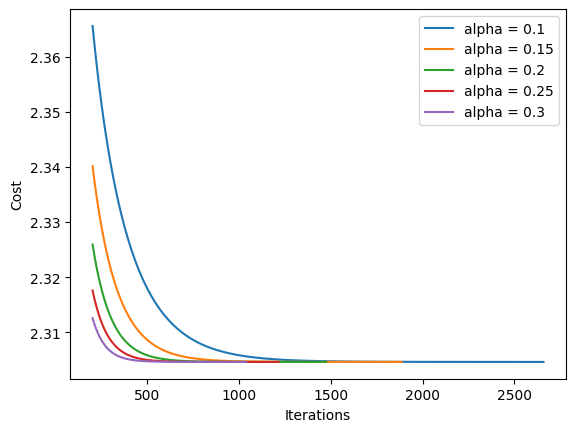

In [28]:
learning_rates = [.1, .15, .2, .25, .3]
times = []
X = []
Y = []
for alpha in learning_rates:
    theta, iter, costs, runtime = gda_algo(scaled_values, y, alpha)
    X.append(iter)
    Y.append(costs)
    times.append(runtime)
    print(theta)
plt.xlabel("Iterations")
plt.ylabel("Cost")
lines = []
for i in range(len(X)):
    line, = plt.plot(X[i], Y[i], label='alpha = ' + str(learning_rates[i]))
    lines.append(line)
plt.legend(handles=lines)

### Part d
As we can see from the graph above, as the learning rate increases the gradient descent algorithm converges quicker (a.k.a takes fewer iterations for the derivative to reach 0). The lines that correspond to 
the greater learning rates also has a steeper drop at the beginning or reach a lower point wuicker, this is because we have more of the derivative effecting the thetas each iteration so it makes sense for the thetas to drop quicker.

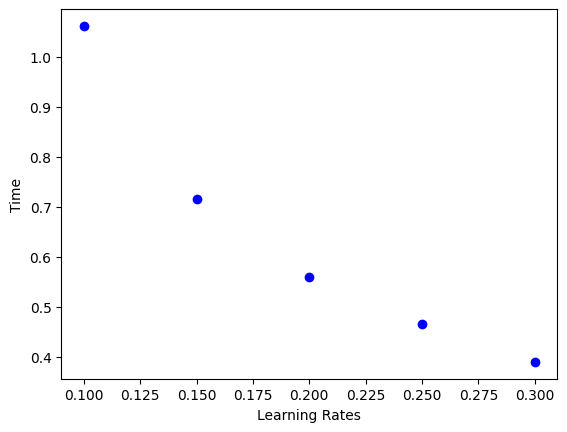

In [29]:
plt.xlabel("Learning Rates")
plt.ylabel("Time")
plt.plot(learning_rates, times, 'bo')

### Extra Credit
The graph above is the runtime of the gradiant descent algorithm, the higher the learning rate the less time the algorithm takes to run because it chips away to the answer quicker

### Part e
Finding thetas using normal equation, that using matrices to find the thetas values<br/><br/>
The folling equation is the normal equation to find the thetas:

$ \theta = (x^Tx)^{-1}x^Ty $

In [30]:
np_x = np.array(scaled_values)
np_y = np.array(y)
answer = np.matmul(np.linalg.inv(np.matmul(np_x.transpose(), np_x)), np.matmul(np_x.transpose(), np_y))
print(answer)

[20.090625   -0.19588953  1.626723   -1.44967936  0.4142235  -3.57801491
  1.444047    0.15763526  1.23776483  0.47595069 -0.31702919]


The solution for thetas from the normal equation is as follows:

$ \theta_0 = 20.090625 $ <br/>
$ \theta_1 = -0.19588953 $ <br/>
$ \theta_2 = 1.626723 $ <br/>
$ \theta_3 = -1.44967936 $ <br/>
$ \theta_4 = 0.4142235 $ <br/>
$ \theta_5 = -3.57801491 $ <br/>
$ \theta_6 = 1.444047 $ <br/>
$ \theta_7 = 0.15763526 $ <br/>
$ \theta_8 = 1.23776483 $ <br/>
$ \theta_9 = 0.47595069 $ <br/>
$ \theta_{10} = -0.31702919 $ <br/>

### Part f
| Thetas of Gradient Descent with $ \alpha = .2$ | Thetas of Normal Equation |
| :-: | :-: |
|$ \theta_0 = 20.090625 $ | $ \theta_0 = 20.090625 $|
|$ \theta_1 = -0.19537934259258968 $ | $ \theta_1 = -0.19588953 $|
|$ \theta_2 = 1.6246341872079055 $ | $ \theta_2 = 1.626723 $|
|$ \theta_3 = -1.448927090832487 $ | $ \theta_3 = -1.44967936 $|
|$ \theta_4 = 0.41438978451126596 $ | $ \theta_4 = 0.4142235 $|
|$ \theta_5 = -3.5763902059485586 $ | $ \theta_5 = -3.57801491 $|
|$ \theta_6 = 1.4435747830541494 $ | $ \theta_6 = 1.444047 $|
|$ \theta_7 = 0.15761829495090707 $ | $ \theta_7 = 0.15763526 $|
|$ \theta_8 = 1.2377635867006354 $ | $ \theta_8 = 1.23776483 $|
|$ \theta_9 = 0.4761770526465798 $ | $ \theta_9 = 0.47595069 $|
|$ \theta_{10} = -0.3181242907655627 $ | $ \theta_{10} = -0.31702919 $|

As we can see from the table above the values from the gradient descent algorithm are pretty close to the values gathered from the normal equations. They are not exact because the gradient descent algorithm checks for convergence when the difference between the new theta and old theta is less than $ 10^{-5} $ but this is not exactly zero so we have to account for a bit of error when comparing these solutions, and in this case they are what I consider within the margin of error, and are objectively the same solutions.